In [15]:
import pandas as pd 
from matplotlib import pyplot as plt
import math

N = 3 # Size of window for N-day rolling std

df = pd.read_csv("../WTI.csv", index_col="Date", parse_dates=True)


In [17]:
clouds = pd.read_csv("../combined.csv", parse_dates=True, index_col=0)

# start = max(pd.to_datetime(clouds.index.min()), df.index.min())
# end = min(pd.to_datetime(clouds.index.max()), df.index.max())
start = pd.Timestamp("2017-01-05")
end = pd.Timestamp("2018-01-05")
print("Start: ", df.loc[start].name)
print("End: ", df.loc[end].name)
df = df[start:end]
df


Start:  2017-01-05 00:00:00
End:  2018-01-05 00:00:00


,Price
Date,
2017-01-05,53.76
2017-01-06,53.99
2017-01-09,51.96
2017-01-10,50.82
2017-01-11,52.25
...,...
2018-01-01,60.42
2018-01-02,60.37
2018-01-03,61.63


In [25]:
# rolling standard deviation of price
# df['v'] = df['Price'].rolling(N).std() ** 2
df['v'] = df['Price'].rolling(N).std()


-0.04584074098546242
-0.11462435737783916


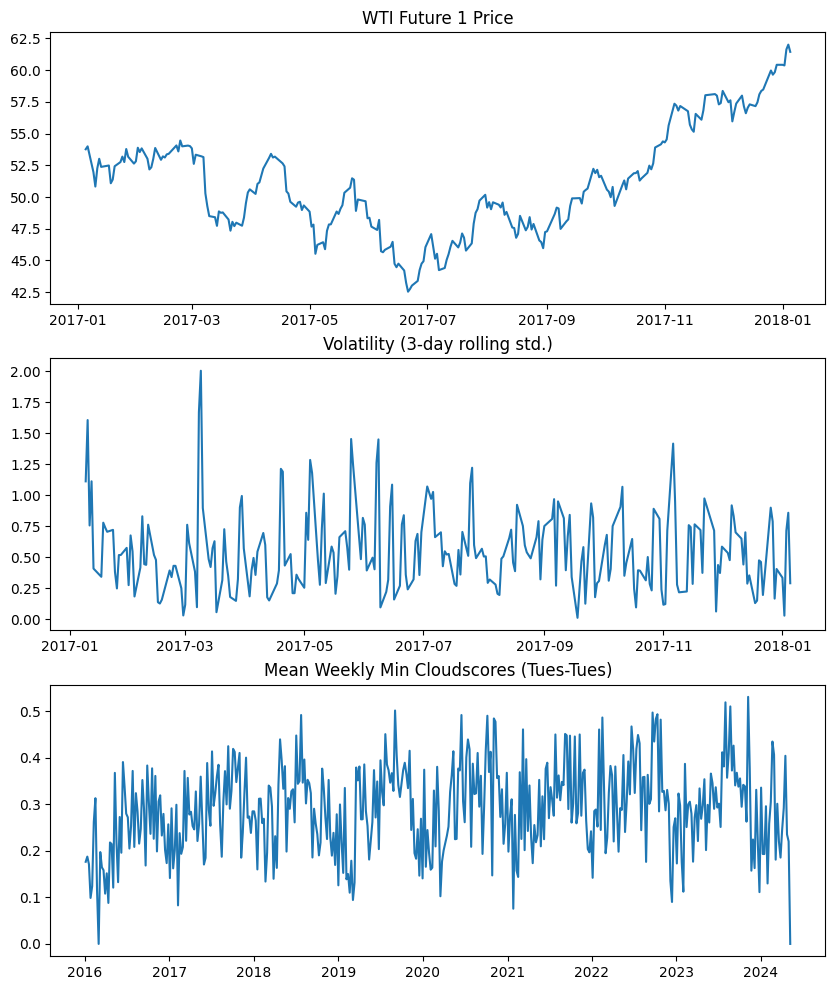

In [26]:
fig, axs = plt.subplots(3, figsize=(10, 12))
axs[0].plot(df['Price'])
axs[0].set_title("WTI Future 1 Price")
axs[1].plot(df['v'])
axs[1].set_title(f"Volatility ({N}-day rolling std.)")
axs[2].plot(clouds.mean(axis=1))
axs[2].set_title("Mean Weekly Min Cloudscores (Tues-Tues)")

print(df['v'].corr(clouds.mean(axis=1)))
print(df['Price'].corr(clouds.mean(axis=1)))

In [22]:
start = pd.Timestamp("2016-01-05")
end = pd.Timestamp("2024-01-05")



wti = pd.read_csv("../WTI.csv", index_col="Date", parse_dates=True)

In [27]:
uso = pd.read_csv("../USO.csv", index_col="Date", parse_dates=True)


In [34]:
# pd.corr(wti[start:end], uso[start:end])
# wti["Adj Close"].corr()

wti = wti[start:end]
uso = uso[start:end]
uso["Close"].corr(wti["Price"])



0.18343650893245425

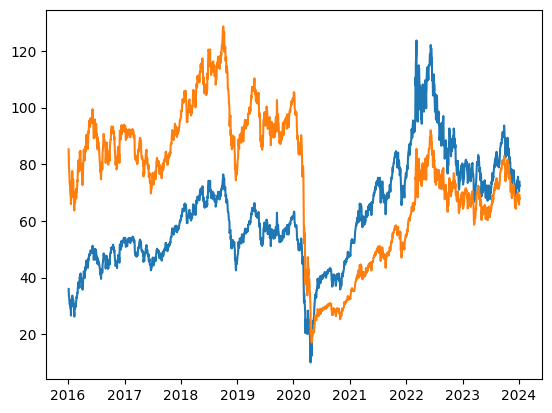

In [32]:
from matplotlib import pyplot as plt 

plt.plot(wti["Price"])
plt.plot(uso["Close"])
plt.show()